In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib
from matplotlib.ticker import NullFormatter, FixedLocator
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.image as mpimg
# matplotlib.artist.getp(fig.patch) # https://matplotlib.org/stable/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import Math
import sympy as sym
from sympy.plotting import plot as symplot

sym.init_printing()  # automatically enable the best printer available in your environment.
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
# latex output
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update({
    'text.usetex': True,
    'pgf.rcfonts': False,
    "pgf.preamble": [
        r'\usepackage{color}'     # xcolor for colours
    ]
})
matplotlib.rcParams['savefig.pad_inches'] = 0
# use plt.savefig('figure.pdf') as export

In [2]:
# usually this notebook is loaded as top-level-module and relative import of chsimpy does not work.
# so we provide the path to the chsimpy package manually
import pathlib
import sys

try:
    import chsimpy
except ImportError:
    _parentdir = pathlib.Path("./").resolve().parent
    sys.path.insert(0, str(_parentdir))
    import chsimpy
    #sys.path.remove(str(_parentdir))

# auto reload if chsimpy code changed
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# labels and colors used throughout this notebook
yclabel = '$\mid \widetilde{c}_A - \widetilde{c}_B\mid$'
wtseplabel = '$\widetilde{t}_{0}$'
tseplabel = '$t_0$'
yslabel = '$\mid \widetilde{s}_A - \widetilde{s}_B\mid$'
color1 = '#b72300'  # https://venngage.com/tools/accessible-color-palette-generator
color2 = '#1005af'
color3 = '#00581a'
msize = 2 # markersize
m1 = 'o' # marker symbol
m2 = '.'

In [14]:
dirfiles = '../_output/v0.9b'
fileid = '0.89-independent'
rawfile = f"{dirfiles}/experiment-{fileid}-raw.csv"
sysinfofile = f"{dirfiles}/experiment-{fileid}-metadata.csv"
aggfile = f"{dirfiles}/experiment-{fileid}-agg.csv"
paramfile = f"{dirfiles}/solution-{fileid}-run0.yaml"

# A0+A1 varied both
dirfiles2 = '../_output/v0.9b-afile-uinit-089'
fileid2 = 'matlab-Afile-simple'
rawfile2 = f"{dirfiles2}/experiment-{fileid2}-raw.csv"
sysinfofile2 = f"{dirfiles2}/experiment-{fileid2}-metadata.csv"
aggfile2 = f"{dirfiles2}/experiment-{fileid2}-agg.csv"
paramfile2 = f"{dirfiles2}/solution-{fileid2}-run0.yaml"

In [15]:
solution = chsimpy.utils.yaml_import(paramfile)
solution2 = chsimpy.utils.yaml_import(paramfile2)
N = solution.params.N
L = solution.params.L

dfraw = pd.read_csv(rawfile, index_col=['id'])
dfraw = dfraw.drop(columns=dfraw.columns[0]) # drops unnamed column
dfraw['cb_ca'] = abs(dfraw['cb']-dfraw['ca'])
dfraw['sb_sa'] = abs(dfraw['sb']-dfraw['sa'])
dfraw['tsep'] = dfraw['tsep']*solution.time_fac/60 # in minutes

dfraw2 = pd.read_csv(rawfile2, index_col=['id'])
dfraw2 = dfraw2.drop(columns=dfraw2.columns[0]) # drops unnamed column
dfraw2['cb_ca'] = abs(dfraw2['cb']-dfraw2['ca'])
dfraw2['sb_sa'] = abs(dfraw2['sb']-dfraw2['sa'])
dfraw2['tsep'] = dfraw2['tsep']*solution2.time_fac/60 # in minutes

dfagg = dfraw.loc[:, dfraw.columns != 'id'].describe()
dfagg.loc['cv'] = dfagg.loc['std'] / dfagg.loc['mean']
dfagg = dfagg.T
dfagg = dfagg.astype({"count":"int"})

dfagg2 = dfraw2.loc[:, dfraw2.columns != 'id'].describe()
dfagg2.loc['cv'] = dfagg2.loc['std'] / dfagg2.loc['mean']
dfagg2 = dfagg2.T
dfagg2 = dfagg2.astype({"count":"int"})

sysinfo = pd.read_csv(sysinfofile, index_col='key', names=['key','value'])
count = int(dfagg['count']['A0'])
count2 = int(dfagg2['count']['A0'])
set_A0 = range(0, int(count/2))
set_A1 = range(int(count/2), count)
u0 = solution.params.XXX
ca_mean = dfagg['mean']['ca']
cb_mean = dfagg['mean']['cb']
#
if u0 == 0.875:
    y2lim=(32, 48)
elif u0 == 0.89:
    y2lim=(16, 32)
elif u0 == 0.885:
    y2lim=(20,36)
elif u0 == 0.88:
    y2lim=(24,40)

In [16]:
dfagg2#.to_csv('A0xA1.csv')

,count,mean,std,min,25%,50%,75%,max,cv
A0,100,-151.308687,0.439926,-152.012659,-151.683336,-151.355605,-150.878690,-150.512931,-0.002907
A1,100,-85.617304,0.258793,-86.039633,-85.854457,-85.581701,-85.375342,-85.193885,-0.003023
ca,100,0.812363,0.003588,0.805049,0.810241,0.812176,0.815013,0.819873,0.004417
cb,100,0.972299,0.001227,0.969694,0.971344,0.972386,0.973108,0.974686,0.001262
sa,100,0.854726,0.002094,0.850438,0.853473,0.854603,0.856255,0.859116,0.002450
sb,100,0.949032,0.000860,0.947238,0.948334,0.949084,0.949612,0.950702,0.000907
tau0,100,832.200000,106.173005,648.000000,764.000000,818.000000,898.250000,1092.000000,0.127581
t0,100,1459.039393,186.145875,1136.094120,1339.468993,1434.143503,1574.840345,1914.528980,0.127581
tsep,100,24.288103,3.102431,18.905681,22.295263,23.873171,26.218119,31.879596,0.127735
fac_A0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# calculate ca cb based on temperature
R = 0.0083144626181532
B = 12.81
T0 = 923.15
Ts = T0 + np.arange(-100,200,25)
Tcount = Ts.shape[0]
x0 = np.linspace(0.7,0.825,Tcount)
x1 = np.linspace(0.0001,0.01,Tcount)
ca = np.zeros(Tcount)
cb = np.zeros(Tcount)
for i in range(0, Tcount):
    T = Ts[i]
    A0t = 186.0575 - 0.3654*T
    A1t = 43.7207 - 0.1401*T
    cacb = chsimpy.utils.get_miscibility_gap(R=R, T=T, B=B, A0=A0t, A1=A1t,
                                             xlower=x0[i], xupper=1.0-x1[i], prec=10)
    ca[i] = cacb[0]
    cb[i] = cacb[1]
    #print(T, ca[i], cb[i])

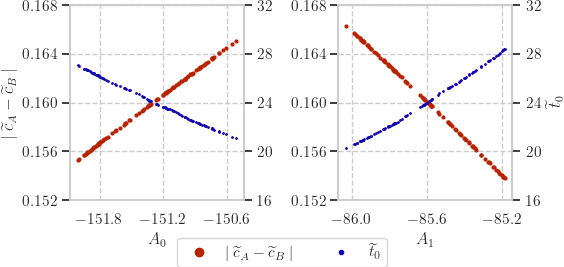

In [28]:
cacb = np.abs(dfraw.ca-dfraw.cb)
ylim=(0.152, 0.168)
#
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
# nrow, ncol, index
p1, = axs[0].plot(dfraw.A0[set_A0], cacb[set_A0], m1, ms=msize, c=color1, label=yclabel)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(3))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(5))
axs[0].set_xlabel('$A_0$')
axs[0].set_ylabel(yclabel)
axs[0].set_ylim(ylim)
ax2 = axs[0].twinx()
p2, = ax2.plot(dfraw.A0[set_A0], dfraw.tsep[set_A0], m2, ms=msize, c=color2, label=wtseplabel)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
ax2.grid(False)
ax2.set_ylim(y2lim)

axs[1].plot(dfraw.A1[set_A1], cacb[set_A1], m1, ms=msize, c=color1, label=yclabel)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(3))
axs[1].yaxis.set_major_locator(plt.MaxNLocator(5))
axs[1].set_xlabel('$A_1$')
#axs[1].set_ylabel(yclabel)
axs[1].set_ylim(ylim)
ax2 = axs[1].twinx()
ax2.plot(dfraw.A1[set_A1], dfraw.tsep[set_A1], m2, ms=msize, c=color2, label=wtseplabel)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
ax2.set_ylabel(wtseplabel)
ax2.grid(False)
ax2.set_ylim(y2lim)
# ps = p1+p2
# labs = [label.get_label() for label in ps]
# legend = axs[0,1].legend(ps, labs, loc='right', facecolor='white')

fig.subplots_adjust(top=0.95)
#fig.suptitle("$\mid\,\widetilde{c}_B-\widetilde{c}_A\mid$ and $\widetilde{t}_{sep}$ for varying $A_0$ and $A_1$ (1\% range)")

fig.tight_layout()


fig.subplots_adjust(top=0.95, bottom=0.3)

legend = fig.legend(bbox_to_anchor=(0.5, 0.2), handles = [p1, p2], labels=[yclabel, wtseplabel],loc='upper center', 
                    fancybox=True, shadow=False, ncol=2, markerscale=3)

plt.savefig('tex/pictures/fig_a0a1_statistics.pdf', bbox_inches='tight', pad_inches=0)
display(fig)
matplotlib.pyplot.close()

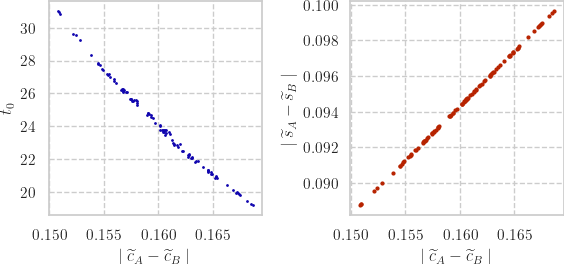

In [17]:
#
sasb2 = np.abs(dfraw2.sa-dfraw2.sb)
cacb2 = np.abs(dfraw2.ca-dfraw2.cb)
#
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
#
axs[0].plot(cacb2, dfraw2.tsep, m2, ms=msize, c=color2)
axs[0].set_xlabel(yclabel)
axs[0].set_ylabel(tseplabel)

axs[1].plot(cacb2, sasb2, m1, ms=msize, c=color1)
axs[1].set_xlabel(yclabel)
axs[1].set_ylabel(yslabel)

fig.subplots_adjust(top=0.95)
#fig.suptitle("$\mid\,\widetilde{c}_B-\widetilde{c}_A\mid$ and $\widetilde{t}_{sep}$ for varying $A_0$ and $A_1$ (1\% range)")

fig.tight_layout()
plt.savefig('tex/pictures/fig_tsep_s_statistics.pdf', bbox_inches='tight', pad_inches=0)
display(fig)
matplotlib.pyplot.close()

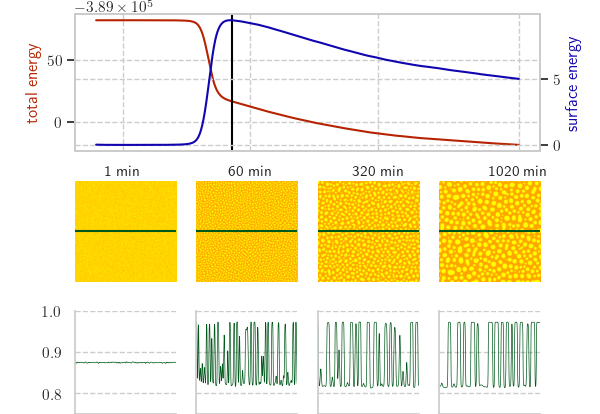

In [18]:
fileid = lambda t: 'paper-pic-'+str(t)+'min-0.875'
path = './_run'
Efile =  f"{path}/solution-{fileid(1020)}.E.csv"
E2file = f"{path}/solution-{fileid(1020)}.E2.csv"
solfile= f"{path}/solution-{fileid(1020)}.yaml"  # solution-paper-pic-320min-0.89.yaml
file_1 = f"{path}/final-{fileid(1)}.png"
file_2 = f"{path}/final-{fileid(60)}.png"
file_3 = f"{path}/final-{fileid(320)}.png"
file_4 = f"{path}/final-{fileid(1020)}.png"

dfE = pd.DataFrame(chsimpy.utils.csv_import_matrix(Efile))
dfE2 = pd.DataFrame(chsimpy.utils.csv_import_matrix(E2file))
#dfU = pd.DataFrame(chsimpy.utils.csv_import_matrix(Ufile))
sol = chsimpy.utils.yaml_import(solfile)
#
fig, axs = plt.subplots(figsize=(6,4), layout=None,
                        gridspec_kw={'wspace': 0.,
                                     'hspace': 0.,
                                     'top': 1,
                                     'right': 1,
                                     'bottom': 0.,
                                     'left': 0.
                                    },)
plt.grid(False)
plt.axis('off')
plt.subplots_adjust(hspace=0.0)

gs_outer = GridSpec(3, 1, figure=fig, height_ratios=[1, 0.75, 0.75], hspace = .25)
gs2 = GridSpecFromSubplotSpec(1, 4, subplot_spec = gs_outer[1])
gs3 = GridSpecFromSubplotSpec(1, 4, subplot_spec = gs_outer[2])
axs00 = fig.add_subplot(gs_outer[0])

axs10 = fig.add_subplot(gs2[0])
axs11 = fig.add_subplot(gs2[1])
axs12 = fig.add_subplot(gs2[2])
axs13 = fig.add_subplot(gs2[3])

axs20 = fig.add_subplot(gs3[0])
axs21 = fig.add_subplot(gs3[1])
axs22 = fig.add_subplot(gs3[2])
axs23 = fig.add_subplot(gs3[3])
# 1st row
axs00.plot(dfE.iloc[2:], c=color1)  # [2:] cuz of wrong first value FIXME:
ax2 = axs00.twinx()
ax2.plot(dfE2.iloc[2:], c=color2)
#axs00.set_ylim((-389017, -388917))
#ax2.set_ylim((0,10))
# axs[0].set_xscale('log')
fwd = lambda x: np.sign(x) * (np.abs(x)) ** (1 / 3)
inv = lambda x: x**3
axs00.set_xscale('function', functions=(fwd,inv))

#axs00.set_xlabel('time (min)')
axs00.set_ylabel('total energy', c=color1)
ax2.set_ylabel('surface energy', c=color2)
axs00.axvline(x=(1477.97), c='black')
# convert iterations to time-scale on x-axis, https://stackoverflow.com/a/74544761
custom_ticks = np.array([0.0, 1, 60, 320, 1020])
factor = 60*0.5705882
axs00.xaxis.set_major_locator(FixedLocator(factor*custom_ticks)) #np.arange(0, 30, 4)**3))
plt.xticks(ticks=factor*custom_ticks[1:],  #plt.xticks()[0][1:], 
           # labels into minutes
           labels=np.char.mod('%d min', np.round(sol.time_fac/60.0 * np.array(plt.xticks()[0][1:], dtype=np.float64))))

# 2nd row
def showpic(ax, fname):
    img = mpimg.imread(fname)
    ax.imshow(img, aspect='equal')
    ax.axhline(0.5*img.shape[0], c=color3)
    ax.grid(False)
    ax.axis('off')
    ax.set_xlabel('')
    ax.set_ylabel('')

showpic(axs10, file_1)
showpic(axs11, file_2)
showpic(axs12, file_3)
showpic(axs13, file_4)

# 3rd row
def showslice(ax, t, yticks=False):
    Ut = chsimpy.utils.csv_import_matrix(f"{path}/solution-{fileid(t)}.U.csv")
    ax.plot(Ut[int(N / 2)+1, :], linewidth=0.5, c=color3)
    #ax.axis('off')
    ax.grid(axis='x')
    ax.set_xlim((0,512))
    ax.set_ylim((0.75,1))
    ax.set_xlabel('')
    ax.set_ylabel('')
    # https://stackoverflow.com/a/54768749
    ax.spines[['right', 'top']].set_visible(False)
    if yticks is False:
        ax.set_yticklabels([])
    ax.set_xticklabels([])

showslice(axs20, 1, yticks=True)
showslice(axs21, 60)
showslice(axs22, 320)
showslice(axs23, 1020)


fig.subplots_adjust(top=1, bottom=0)
#fig.suptitle("Energy decay ($c_0=0.875$)")
#fig.tight_layout()
plt.savefig('tex/pictures/fig_decay.pdf', bbox_inches='tight', pad_inches=0)
display(fig)
matplotlib.pyplot.close()

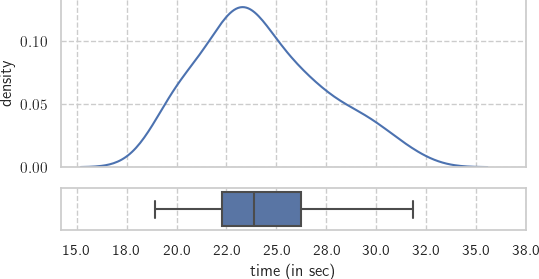

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 3), sharex=True, gridspec_kw={'height_ratios': [4, 1]})
#
# nrow, ncol, index
sns.kdeplot(dfraw2.tsep, ax=axs[0], bw_adjust=1.0)
axs[0].set_xlabel('')
axs[0].set_ylabel('density')

sns.boxplot(dfraw2.tsep, orient='h', ax=axs[1])
axs[1].set_xlabel('time (in sec)')
axs[1].set_ylabel('')
axs[1].set(yticklabels=[])
# convert iterations to time-scale on x-axis, https://stackoverflow.com/a/74544761
plt.xticks(ticks=plt.xticks()[0][1:],
           labels=np.round(np.array(plt.xticks()[0][1:], dtype=np.float64)))
#fig.suptitle(f"Density and boxplot of $t_{{sep}}$ with {count2} random $A_0 \\times A_1$ (1\% range)")

plt.savefig('tex/pictures/fig_density_boxplot.pdf', bbox_inches='tight', pad_inches=0)
display(fig)
matplotlib.pyplot.close()

In [ ]:
yoffset = 1.005
# temperature ca cb points
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
#
# nrow, ncol, index
axs.plot((ca,cb), (Ts,Ts), 'o', ms=4, color='0.5')
axs.axvline(x=ca_mean, ls='dashed', lw=0.8, color='#557799')
axs.axvline(x=cb_mean, ls='dashed', lw=0.8, color='#557799')
axs.axhline(T0, ls='dashed', lw=0.8, color='#557799')
axs.plot((u0), (T0), 'o', ms=5, color='red')
axs.set_xlim((0.7, 1.0))

ax2 = axs.twinx()
dfraw[['cb','ca']].boxplot(ax=ax2, labels=None, positions=[T0, T0], vert=False, widths=(30, 30), showfliers=True)
ax2.set_ylabel('')
ax2.set_yticks(axs.get_yticks())
ax2.set_ylim(axs.get_ylim())
#ax2.yaxis.set_ticklabels([])

axs.set_xlabel('mole fraction (SiO$_2$)')
axs.set_ylabel('temperature (in K)')
axs.text(u0, yoffset*T0, f"$c_0={round(89,1)}\%$",
         usetex = True,
         horizontalalignment='center',
         verticalalignment='bottom')
axs.text(0.71, yoffset*T0, f"{T0} K")
#axs.set_title('Theoretical and simulated miscibility gaps')
axs.set_title(' ')

plt.savefig('tex/pictures/fig_miscibility_gaps.pdf', bbox_inches='tight', pad_inches=0)
display(fig)
matplotlib.pyplot.close()

In [ ]:
R = 0.0083144626181532
B = 12.81
T = 923.15
A0 = -151.26151
A1 = -85.612615

jitter_Arellow = 0.995
jitter_Arelhigh = 1.005
runs = 100

rng = np.random.default_rng(2023)
randv = rng.uniform(jitter_Arellow, jitter_Arelhigh, size=(2, runs))
seta0 = A0 * randv[0]
seta1 = A1 * randv[1]

In [ ]:
x = sym.Symbol('x', real=True)
c = x
E = (R*T * (c*(sym.log(c) - B) + (1-c)*sym.log(1-c)) + (A0 + A1*(1-2*c)) * c * (1-c))
m = (E.subs(x, cb_mean) - E.subs(x, ca_mean))/(cb_mean-ca_mean)
xm=(0.7,1)
axc=0.7
plt.rcParams['lines.linewidth'] = 0.7 
p1 = symplot(E, (x, 0.7, 0.999), show=False, 
             line_color='black',
             backend='matplotlib',
             size=(6, 3),
             xlim=xm,
             axis_center=[axc, -98.65],
             xlabel='mole fraction (SiO$_2$)', ylabel='energy per mole',
             title=' '
             #title=f"Estimated Gibbs free energies with {runs} random $A_0$, $A_1$ (1\% range)"
            )
for i in range(0, runs):
    A0 = seta0[i]
    A1 = seta1[i]
    Etmp = (R*T * (c*(sym.log(c) - B) + (1-c)*sym.log(1-c)) + (A0 + A1*(1-2*c)) * c * (1-c))
    ptmp = symplot(Etmp, (x, 0.7, 0.999), show=False, line_color='0.8', xlim=xm)
    p1.append(ptmp[0])
p1.append(p1[0]) # again, just for overdrawing
# tangent for p1
p2 = symplot(m*(x-ca_mean)+E.subs(x, ca_mean), (x, 0.7, 0.999), show=False, xlim=xm, line_color=color2)
p1.append(p2[0])
p1back = p1.backend(p1)
p1back.fig.gca().axvline(x=ca_mean, ls='dashed', lw=0.8, color='#557799')
p1back.fig.gca().axvline(x=cb_mean, ls='dashed', lw=0.8, color='#557799')

p1back.process_series()
p1back.fig.savefig('tex/pictures/fig_estimate_gibbs.pdf', bbox_inches='tight', pad_inches=0)
p1back.show()
plt.rcParams['lines.linewidth'] = 1 

In [ ]:
R = 0.0083144626181532
B = 12.81
T0 = 923.15
Ts = [T0, T0+150]
A0 = -151.26151
A1 = -85.612615
c = x
E = (R*Ts[0] * (c*(sym.log(c) - B) + (1-c)*sym.log(1-c)) + (A0 + A1*(1-2*c)) * c * (1-c))

p1 = symplot(E, (x, 0.7, 0.999), show=False, 
             line_color='black', 
             backend='matplotlib',
             axis_center=[0.69, -98.5],
             title=f"T={Ts[0]}",
             xlabel='mole fraction (SiO_2)', ylabel='energy per mole')

A0 = 186.0575 - 0.3654*Ts[1]
A1 = 43.7207 - 0.1401*Ts[1]
Etmp = (R*Ts[1] * (c*(sym.log(c) - B) + (1-c)*sym.log(1-c)) + (A0 + A1*(1-2*c)) * c * (1-c))
p2 = symplot(Etmp, (x, 0.7, 0.999), show=False, 
             line_color='0.2',
             axis_center=[0.69, -120.0],
             title=f"T={Ts[1]}",
             xlabel='mole fraction (SiO_2)', ylabel='energy per mole'
            )

plotgrid = sym.plotting.PlotGrid(1, 2, p1, p2, show=False, size=(10, 5))
plotgrid.show()

In [ ]:
R = 0.0083144626181532
B = 12.81
T0 = 923.15
T = T0+150
A0 = -151.26151
A1 = -85.612615
chsimpy.utils.get_miscibility_gap(R=R, T=T, B=B, A0=A0, A1=A1,
                                  xlower=0.85, xupper=0.99, prec=10)

In [ ]:
ragg = dfagg2.drop(['fac_A0', 'fac_A1', 'tau0', 't0'], axis=0)
ragg = ragg.drop(columns='count')
new_index = ['A0','A1','ca','cb','cb_ca','sa','sb','sb_sa','tsep']
ragg = ragg.reindex(new_index)
s = ragg.style
s = s.format(precision=3)
xagg = s.to_latex(hrules=True)
#xagg = xagg.replace('%','\%')
#xagg = xagg.replace('fac_','fac')
xagg = xagg.replace('25%','$Q_{0.25}$')
xagg = xagg.replace('50%','$Q_{0.50}$')
xagg = xagg.replace('75%','$Q_{0.75}$')
xagg = xagg.replace('A0', '$\\randA_0$')
xagg = xagg.replace('A1', '$\\randA_1$')
xagg = xagg.replace('tsep', '$\\randtsep$')
xagg = xagg.replace('tau0', '$\\widetilde{\\tau}_0$')
xagg = xagg.replace('cb_ca', '$|\,\\randc_B-\\randc_A|$')
xagg = xagg.replace('sb_sa', '$|\,\\rands_B-\\rands_A|$')
xagg = xagg.replace('ca', '$\\randc_A$')
xagg = xagg.replace('cb', '$\\randc_B$')
xagg = xagg.replace('sa', '$\\rands_A$')
xagg = xagg.replace('sb', '$\\rands_B$')
content = r'\documentclass{scrartcl}\usepackage{graphicx,booktabs}'
content += r'\newcommand{\randA}{\widetilde{A}}'+'\n'
content += r'\newcommand{\randc}{\widetilde{c}}'+'\n'
content += r'\newcommand{\rands}{\widetilde{s}}'+'\n'
content += r'\newcommand{\tsep}{t_0}%{t_{\textsf{sep}}}'+'\n'
content += r'\newcommand{\randtsep}{\widetilde{\tsep}}'+'\n'
content += r'\begin{document}'+'\n'
content += xagg
content += r'\includegraphics[width=\textwidth]{pictures/fig_a0a1_statistics.pdf}\newline - \newline'+'\n'
content += r'\includegraphics[width=\textwidth]{pictures/fig_tsep_s_statistics.pdf}\newline - \newline'+'\n'
content += r'\includegraphics[width=\textwidth]{pictures/fig_decay.pdf}\newline - \newline'+'\n'
content += r'\includegraphics[width=\textwidth]{pictures/fig_density_boxplot.pdf}\newline - \newline'+'\n'
content += r'\includegraphics[width=\textwidth]{pictures/fig_miscibility_gaps.pdf}\newline - \newline'+'\n'
content += r'\includegraphics[width=\textwidth]{pictures/fig_estimate_gibbs.pdf}\newline - \newline'+'\n'
content += r'\begin{verbatim}'+str(vars(solution)).replace(", '", "\n '")+'\end{verbatim}\n'
content += r'\begin{verbatim}'+str(vars(solution.params)).replace(", '", "\n '")+'\end{verbatim}\n'
content += r'\end{document}'

with open('tex/fig.tex','w') as f:
    f.write(content)